<a href="https://colab.research.google.com/github/mrdbcse/deep-learning-pytorch/blob/master/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

* Link: https://www.learnpytorch.io/01_pytorch_workflow/

In [309]:
!nvidia-smi

Tue Feb 25 15:25:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             49W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [310]:
import torch
from torch import nn # These are the basic building blocks for graphs (nural network)
import matplotlib.pyplot as plt


# torch version
torch.__version__

'2.5.1+cu124'

### Data preparing and Loading

In [311]:
# 1. Linear regression
# formula: y = a + bx

weight = 0.7 # b
bias = 0.3 # a

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [312]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [313]:
# create a train/ test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Data Visualization


In [314]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # plot predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # legends
  plt.legend(prop={"size": 14})

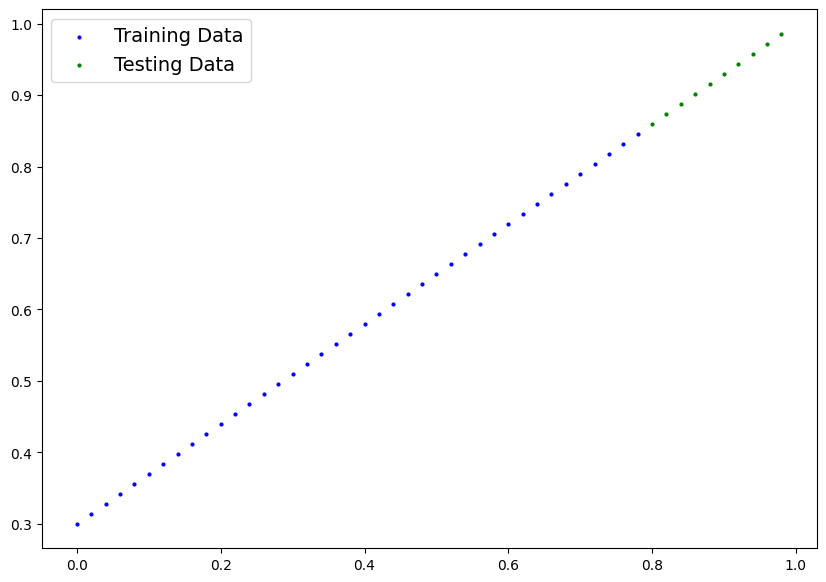

In [315]:
plot_predictions()

### Building PyTorch Model


In [316]:
from torch import nn

# create a linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### Checking the contents of a PyTorch model

In [317]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Making predictions using `torch.inference_mode()`

In [318]:
# make predictions

with torch.inference_mode():
  y_pred = model_0(X_test)

# check predictions

print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_pred)}")

print(f"Predicted values: {y_pred}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


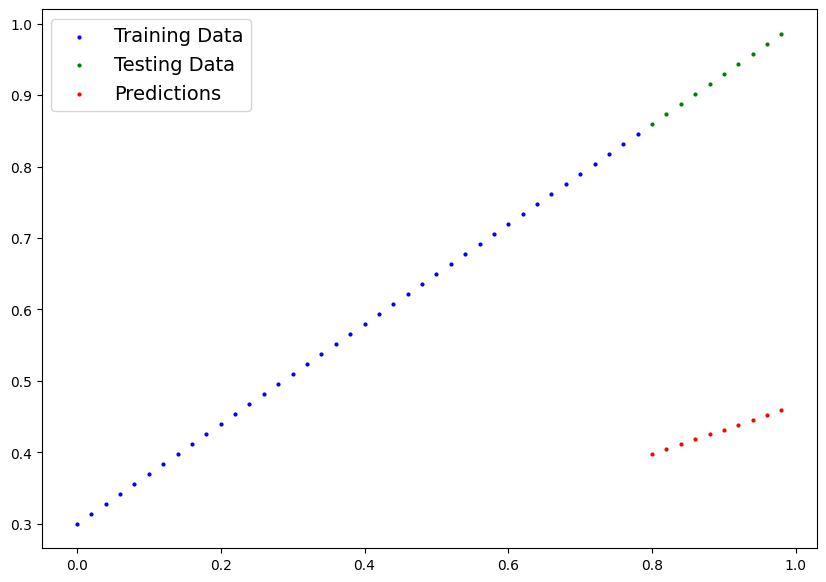

In [319]:
plot_predictions(predictions=y_pred)

### Creating a Loss function and Optimizer

In [320]:
# create a loss function
loss_fn = nn.L1Loss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Building a Training and Testing Loop

In [321]:
import torch
torch.manual_seed(42)
# setting the number of epochs
epochs = 2000
# creating an empty loss list to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # --------------training----------------
  # putting model in training mode
  model_0.train()

  # 1. forward propagation on training data set
  y_pred = model_0(X_train)
  # print(y_pred)

  # 2. calculate the loss
  train_loss = loss_fn(y_pred, y_train)

  # 3. zero grad of the optimizer
  optimizer.zero_grad()

  # 4. loss backward
  train_loss.backward()

  # 5. progress the optimizer
  optimizer.step()

  # -------------- testing ----------------

  model_0.eval()
  with torch.inference_mode():
    # 1. forward propagation on test data set
    test_pred = model_0(X_test)

    # 2. calculate the loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    # 3. printing bts
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")






Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss:

In [322]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [323]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

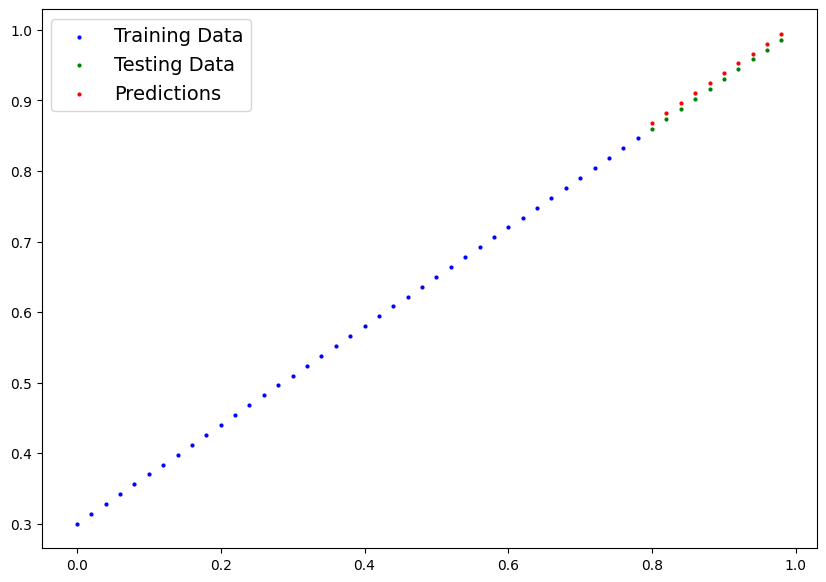

In [324]:
plot_predictions(predictions=y_pred_new)

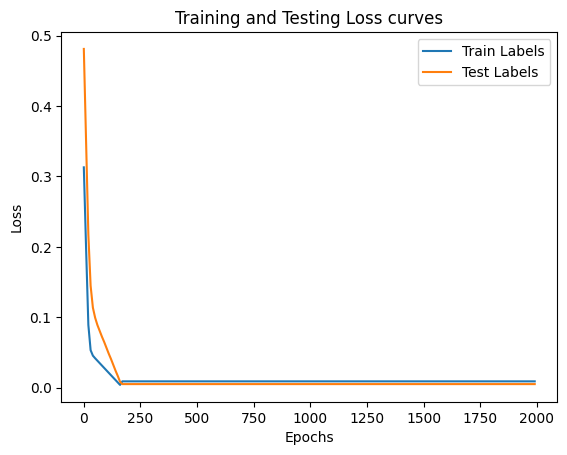

In [325]:
plt.plot(epoch_count, train_loss_values, label="Train Labels")
plt.plot(epoch_count, test_loss_values, label="Test Labels")

plt.title("Training and Testing Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Saving and loading PyTorch model

In [327]:
from pathlib import Path

# models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"MODEL SAVE PATH: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

MODEL SAVE PATH: models/model_0_pytorch_workflow.pth


In [328]:
# checking the saved file path

!ls -l models/model_0_pytorch_workflow.pth

-rw-r--r-- 1 root root 1662 Feb 25 16:36 models/model_0_pytorch_workflow.pth


In [332]:
# Loading a saved model

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# checking

print(f"Model 0 State Dict: {model_0.state_dict()}")
print(f"Loaded Model 0 State Dict: {loaded_model_0.state_dict()}")


Model 0 State Dict: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Loaded Model 0 State Dict: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
